In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE 

In [3]:
data = pd.read_csv('heart_failure_clinical_records.csv')
df = data  # Creating a copy of original df is always a good practice

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.shape

(299, 13)

# EDA

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Insight 1 => No null values present

In [8]:
#Lets describe the data
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [9]:
df['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

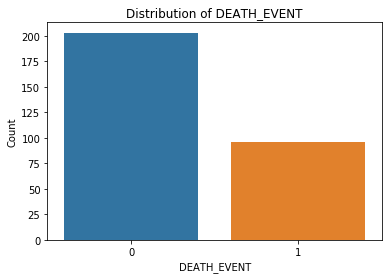

In [10]:
sns.countplot(x='DEATH_EVENT', data=df)
plt.title('Distribution of DEATH_EVENT')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Count')

plt.show()

# Insight2 => We can see that this is IMBALANCED DATASET. 
## There are so much techniques of handling imbalanced data. For this case we can use SMOTE

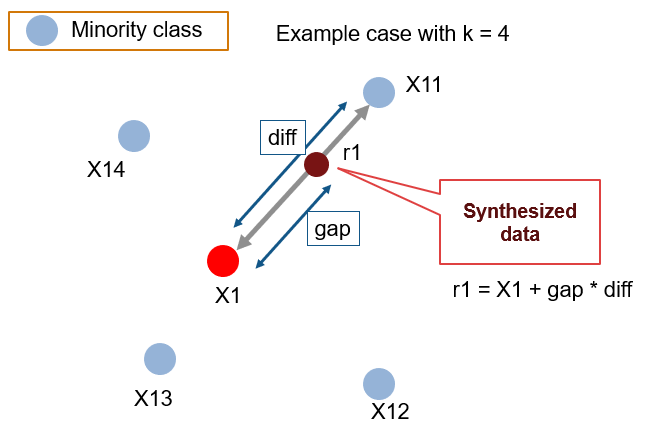

In [11]:
oversample = SMOTE()
X, y = oversample.fit_resample(df.drop('DEATH_EVENT',axis=1),df['DEATH_EVENT'])

In [12]:
X

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
401,81.808952,1,847,1,49,0,321067.428619,1.019105,144,0,0,29
402,77.550111,0,695,0,34,0,263358.030000,1.457684,134,0,0,66
403,46.509857,0,535,0,34,0,385385.487210,1.048186,144,1,0,71
404,70.000000,1,98,0,53,0,351000.000000,1.117652,135,0,0,62


In [13]:
y

0      1
1      1
2      1
3      1
4      1
      ..
401    1
402    1
403    1
404    1
405    1
Name: DEATH_EVENT, Length: 406, dtype: int64

In [14]:
df1_ = pd.DataFrame(X,columns = df.drop('DEATH_EVENT',axis=1).columns)
df2_ = pd.DataFrame(y, columns = ['DEATH_EVENT'])

In [15]:
df1_

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,75.000000,0,582,0,20,1,265000.000000,1.900000,130,1,0,4
1,55.000000,0,7861,0,38,0,263358.030000,1.100000,136,1,0,6
2,65.000000,0,146,0,20,0,162000.000000,1.300000,129,1,1,7
3,50.000000,1,111,0,20,0,210000.000000,1.900000,137,1,0,7
4,65.000000,1,160,1,20,0,327000.000000,2.700000,116,0,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...
401,81.808952,1,847,1,49,0,321067.428619,1.019105,144,0,0,29
402,77.550111,0,695,0,34,0,263358.030000,1.457684,134,0,0,66
403,46.509857,0,535,0,34,0,385385.487210,1.048186,144,1,0,71
404,70.000000,1,98,0,53,0,351000.000000,1.117652,135,0,0,62


In [16]:
df2_

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
401,1
402,1
403,1
404,1


In [17]:
after_smote_df = pd.concat([df1_, df2_], axis=1)

In [18]:
print("INITIAL DATA SHAPE : ", df.shape)
print("AFTER SMOTE SHAPE : ", after_smote_df.shape)
# Now the data is balanced..we are keeping the original data as we will se the model performace with raw data as well.

INITIAL DATA SHAPE :  (299, 13)
AFTER SMOTE SHAPE :  (406, 13)


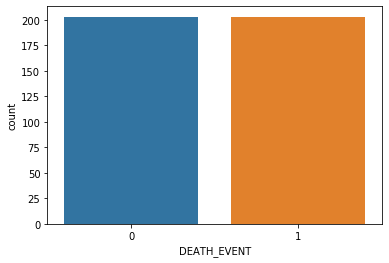

In [19]:
sns.countplot(x= 'DEATH_EVENT',data = after_smote_df)
plt.show()

In [20]:
new_samples = pd.DataFrame(X[len(df):])
print("Newly generated samples: \n", new_samples)

Newly generated samples: 
            age  anaemia  creatinine_phosphokinase  diabetes  \
299  71.748270        1                       110         0   
300  65.208155        0                       273         0   
301  65.538386        0                      3254         0   
302  45.771722        0                       551         0   
303  71.704054        0                       605         1   
..         ...      ...                       ...       ...   
401  81.808952        1                       847         1   
402  77.550111        0                       695         0   
403  46.509857        0                       535         0   
404  70.000000        1                        98         0   
405  64.426364        0                        85         0   

     ejection_fraction  high_blood_pressure      platelets  serum_creatinine  \
299                 25                    0  274022.884542          1.001144   
300                 23                    1  253320.8154

In [21]:
# Creating a copy of smote_df
fdf = after_smote_df

In [22]:
fdf.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [23]:
# Checking for Duplicates
fdf.duplicated().sum()

0

# Now let's check the distribution, Outliers, Correlation between the Independent Variables
### For Distribution = Histogram is used
### For Outliers = Boxplot is used
### For Correlation = ScatterPlot/Heatmap is used

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


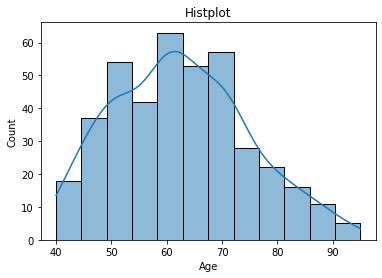

In [24]:
sns.histplot(data = fdf, x='age',kde=True)
plt.title('Histplot')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [25]:
def draw_hist(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 3, figsize = (15, 12))
    
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.histplot(x=column, data=df, ax=axs[row_index, col_index], alpha=0.5, kde=True)
        axs[row_index, col_index].set_title(f'Hist Plot of {column}')
    plt.tight_layout()
    plt.show()


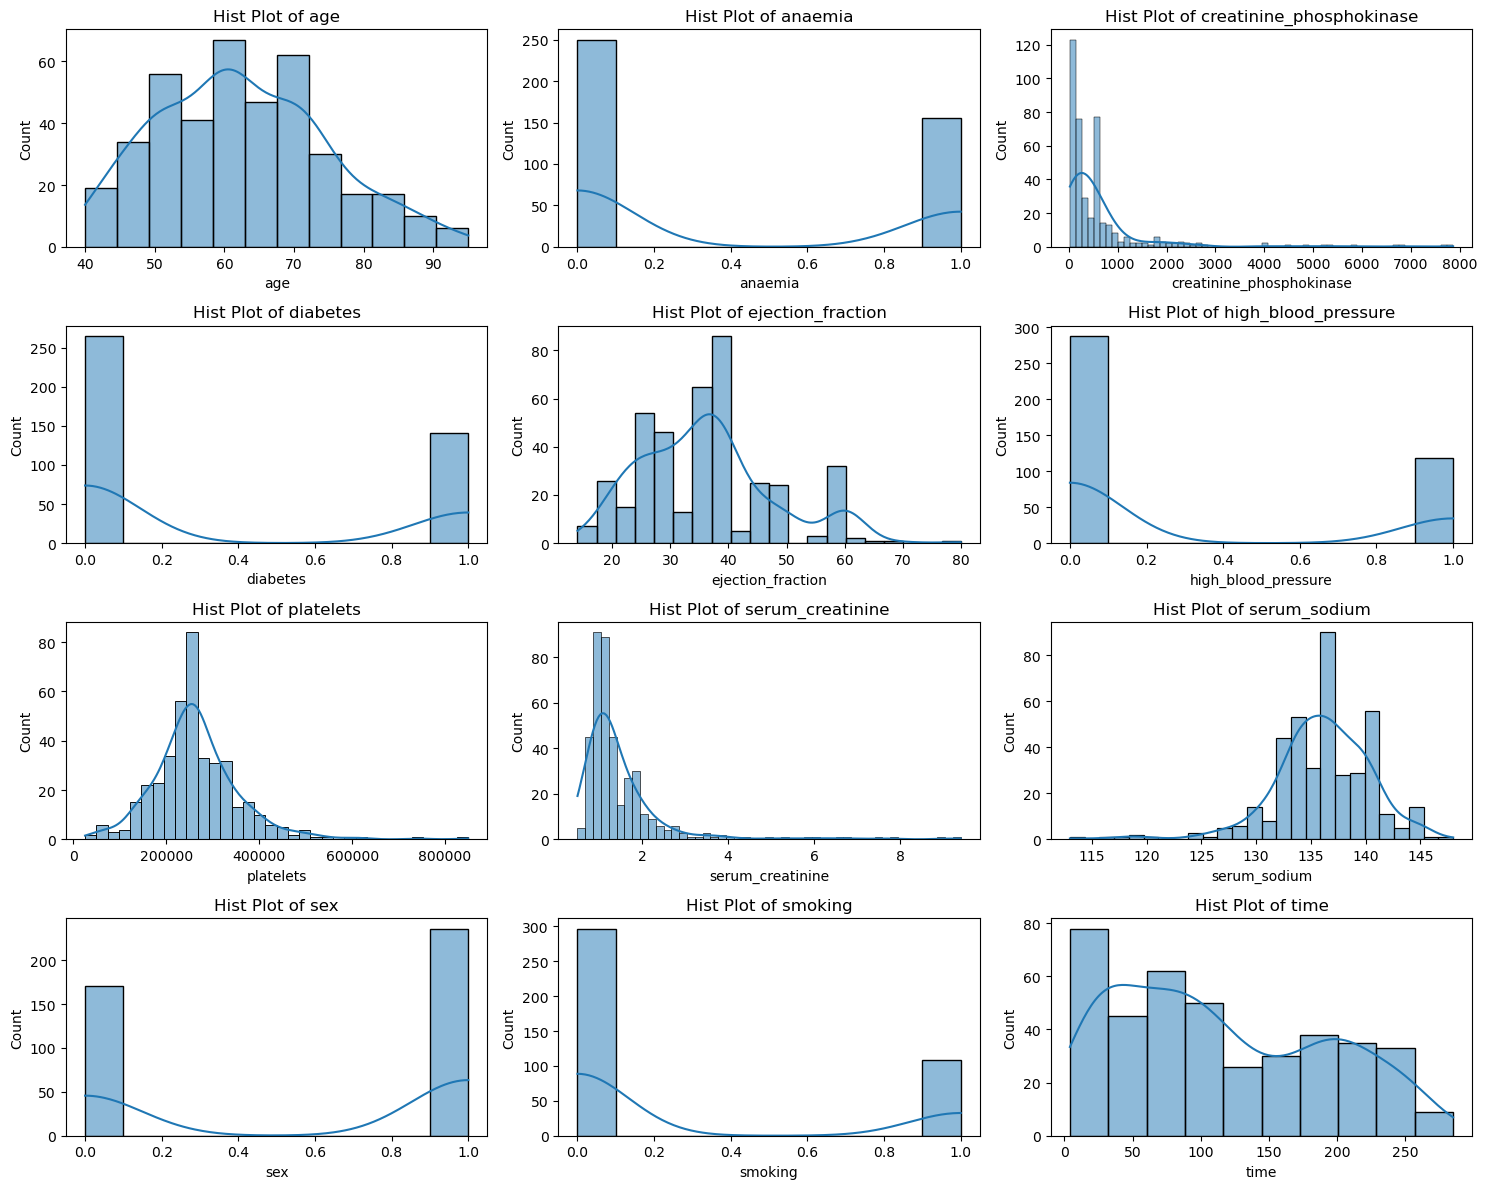

In [25]:
draw_hist(fdf)

In [26]:
# Or we can simply do df.skew() to check skewness
fdf.skew()

age                         0.306122
anaemia                     0.488515
creatinine_phosphokinase    4.301600
diabetes                    0.632445
ejection_fraction           0.574191
high_blood_pressure         0.848068
platelets                   1.256550
serum_creatinine            3.750481
serum_sodium               -0.981819
sex                        -0.382536
smoking                     1.166618
time                        0.376274
DEATH_EVENT                 0.000000
dtype: float64

# Insight 3 => We can see that there are columns which have only 0 and 1 like 'sex', 'smoking' etc. And many of the features are right skewed and only 'serum_sodium' is Left Skewed

In [27]:
# We will deal with skeweness later first viaulize the outliers
def show_boxplots(df:pd.DataFrame):
    fig, axs = plt.subplots(4, 3, figsize = (15, 12))
    
    for i, column in enumerate(df.columns[:-1]):
        row_index = i // 3
        col_index = i % 3
        sns.boxplot(y=column, data=df, ax=axs[row_index, col_index])
        axs[row_index, col_index].set_title(f'Box Plot of {column}')
    plt.tight_layout()
    plt.show()

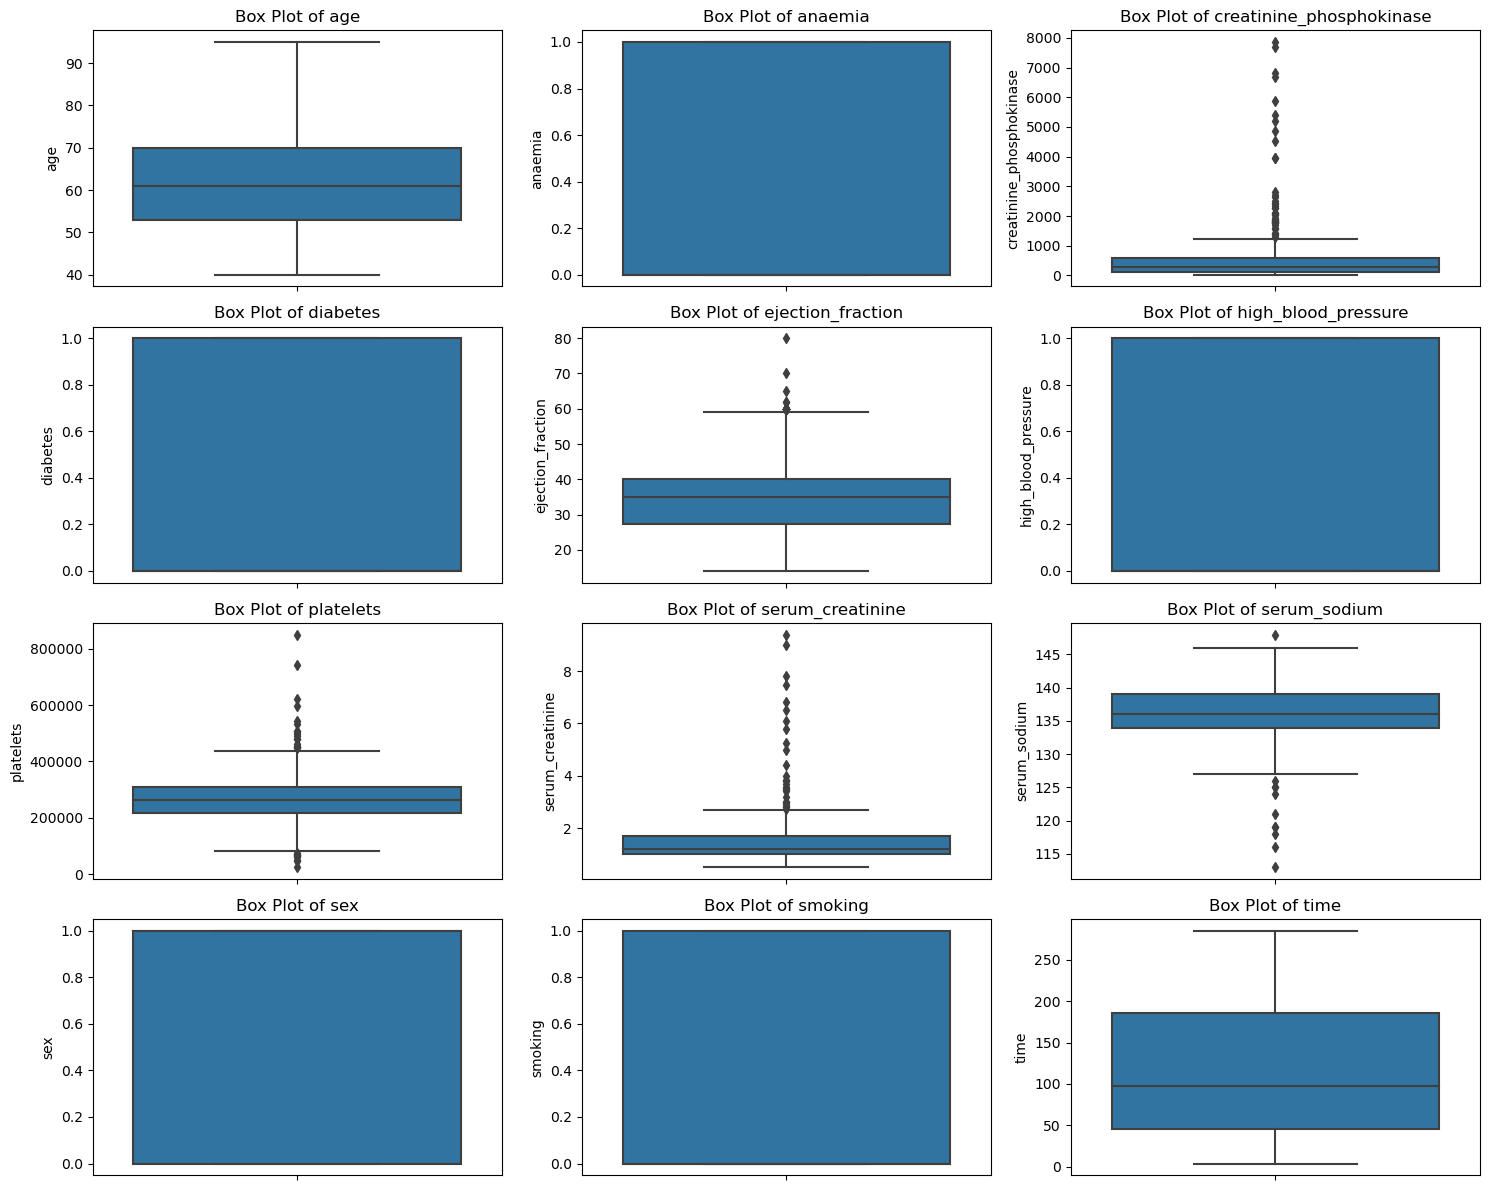

In [28]:
show_boxplots(fdf)

# How to detect Outliers

#### For Normal Distributions
- Use empirical relations of Normal distribution.
- The data points that fall below mean-3*(sigma) or above mean+3*(sigma) are outliers, where mean and sigma are the average value and standard deviation of a particular column.

#### For Skewed Distributions
- Use Inter-Quartile Range (IQR) proximity rule.
- The data points that fall below Q1 – 1.5 IQR or above the third quartile Q3 + 1.5 IQR are outliers, where Q1 and Q3 are the 25th and 75th percentile of the dataset, respectively. IQR represents the inter-quartile range and is given by Q3 – Q1.

#### For Other Distributions
- Use a percentile-based approach.
- For Example, data points that are far from the 99% percentile and less than 1 percentile are considered an outlier.


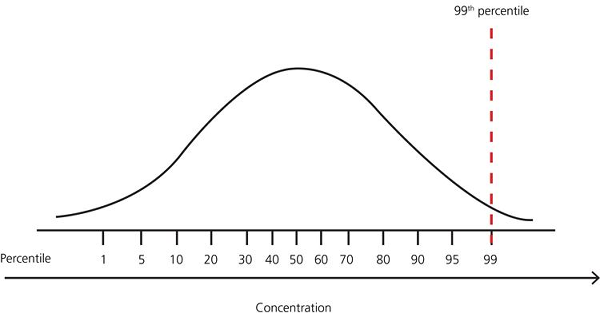

Since our data is skewed, we can use the IQR


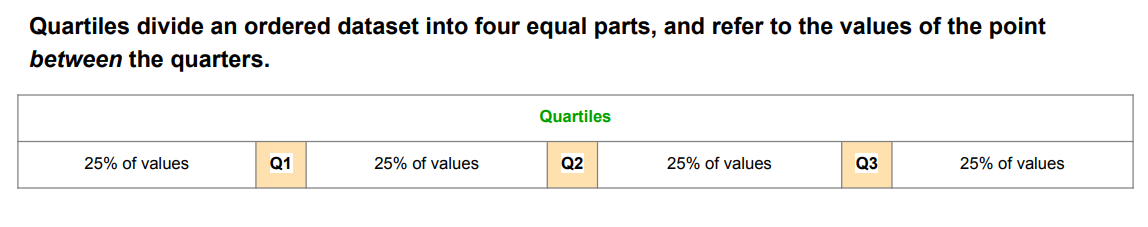

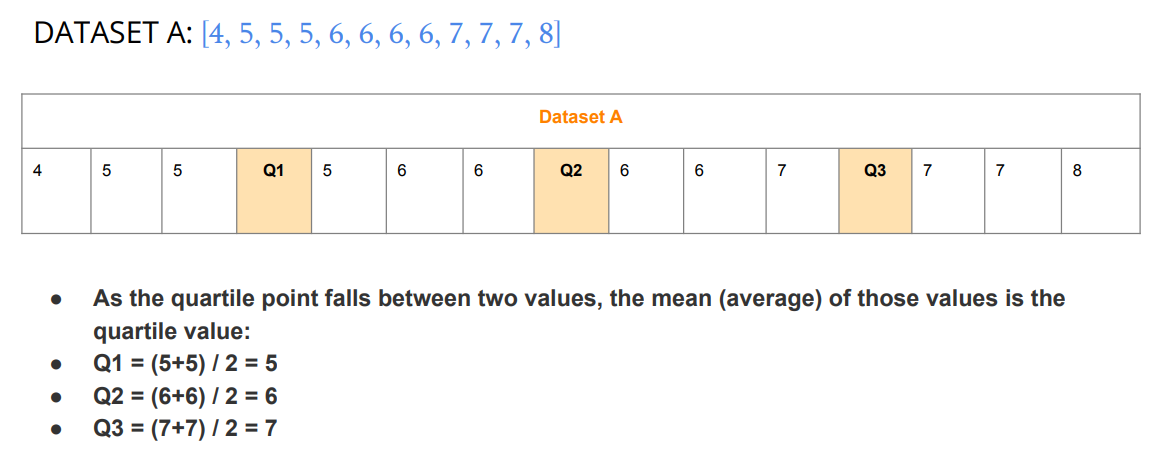

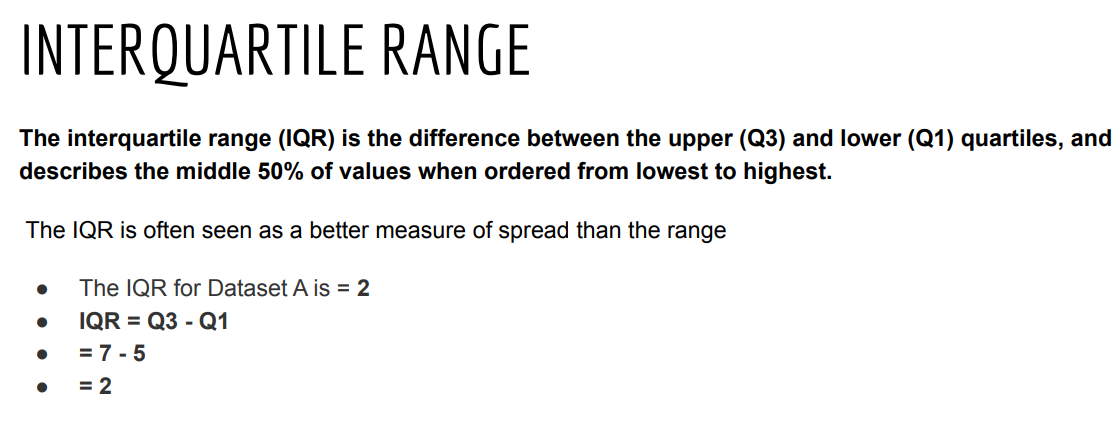

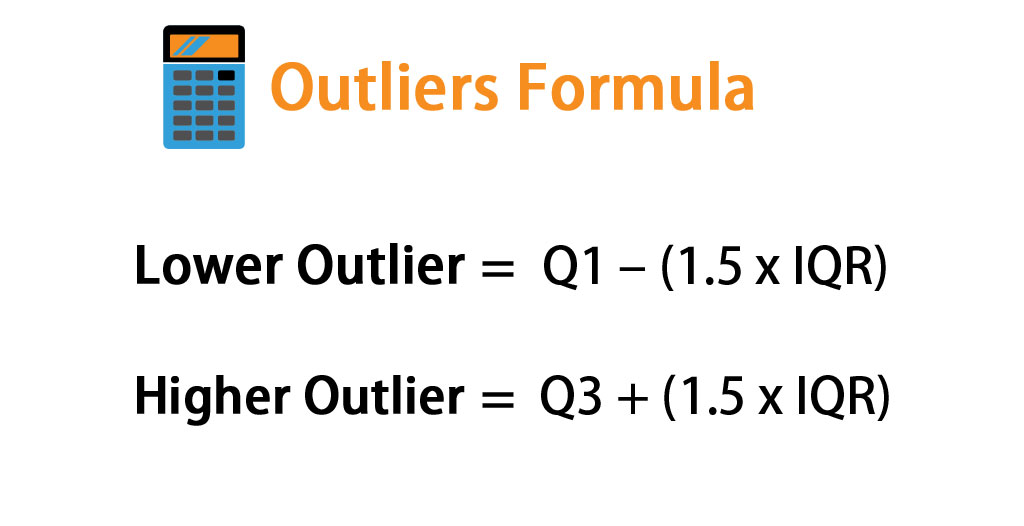

In [74]:
def get_iqr_thresholds(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3 - q1
    lower_fence = q1 - 1.5 * IQR
    upper_fence = q3 + 1.5 * IQR
    return lower_fence, upper_fence

In [75]:
# Outliers are in 5 columns, we can get them using the following method
def get_outliers_count(df: pd.DataFrame):
#     desc_df = fdf.describe()
    outliers_count = {}

    for column in df.columns[:-1]:
        lower_fence, upper_fence = get_iqr_thresholds(df,column)

        # Count outliers in the column
        outlier_count = df[(df[column] < lower_fence) | (df[column] > upper_fence)][column].count()

        outliers_count[column] = outlier_count
         
        
    return outliers_count

In [76]:
outliers = get_outliers_count(fdf)
outliers
# You can verify these in the plot as well

{'age': 0,
 'anaemia': 0,
 'creatinine_phosphokinase': 0,
 'diabetes': 0,
 'ejection_fraction': 0,
 'high_blood_pressure': 0,
 'platelets': 114,
 'serum_creatinine': 0,
 'serum_sodium': 0,
 'sex': 0,
 'smoking': 0,
 'time': 0}

## We can remove the outliers in ejection_fraction as they are very less.Hence, But i am imputing theri values with MEDIAN

In [77]:
fdf.shape

(406, 13)

In [78]:
# Replacing with median as outliers are in numerical features
def impute_outliers_with_median(df: pd.DataFrame, outliers_count_dict: dict):
    for column, outlier_count in outliers_count_dict.items():
        if outlier_count > 2:
            lower_fence, upper_fence = get_iqr_thresholds(df,column)
            # Impute outliers with median
            median_value = df[column].median()
            
            # Replace outliers in the entire DataFrame with median for the specified column
            df[column] = np.where((df[column] < lower_fence) | (df[column] > upper_fence), median_value, df[column])

    return df

In [79]:
fdf = impute_outliers_with_median(fdf, outliers)

In [80]:
get_outliers_count(fdf)

{'age': 0,
 'anaemia': 0,
 'creatinine_phosphokinase': 0,
 'diabetes': 0,
 'ejection_fraction': 0,
 'high_blood_pressure': 0,
 'platelets': 101,
 'serum_creatinine': 0,
 'serum_sodium': 0,
 'sex': 0,
 'smoking': 0,
 'time': 0}

In [81]:
fdf

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.000000,0,582.0,0,20.0,1,265000.000000,1.180000,130.0,1,0.0,4,1
1,55.000000,0,280.5,0,38.0,0,263358.030000,1.100000,136.0,1,0.0,6,1
2,65.000000,0,146.0,0,20.0,0,262421.827677,1.300000,129.0,1,0.0,7,1
3,50.000000,1,111.0,0,20.0,0,262421.827677,1.180000,137.0,1,0.0,7,1
4,65.000000,1,160.0,1,20.0,0,262421.827677,1.180000,137.0,0,0.0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401,81.808952,1,847.0,1,49.0,0,262421.827677,1.019105,144.0,0,0.0,29,1
402,77.550111,0,695.0,0,34.0,0,263358.030000,1.180000,134.0,0,0.0,66,1
403,46.509857,0,535.0,0,34.0,0,262421.827677,1.048186,144.0,1,0.0,71,1
404,70.000000,1,98.0,0,53.0,0,262421.827677,1.117652,135.0,0,0.0,62,1


In [82]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [83]:
# For printing the outliers
outl = find_outliers_IQR(fdf["ejection_fraction"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 0
max outlier value: nan
min outlier value: nan


Series([], Name: ejection_fraction, dtype: float64)

In [44]:
fdf = fdf.drop(outl.index)

In [84]:
outl = find_outliers_IQR(fdf["platelets"])
print("number of outliers: "+ str(len(outl)))
print("max outlier value: "+ str(outl.max()))
print("min outlier value: "+ str(outl.min()))

outl

number of outliers: 101
max outlier value: 275000.0
min outlier value: 242000.0


0      265000.000000
1      263358.030000
8      263358.030000
11     253000.000000
16     262000.000000
           ...      
383    263358.030000
388    263358.030000
391    263358.030000
397    264628.273397
402    263358.030000
Name: platelets, Length: 101, dtype: float64

In [46]:
fdf = fdf.drop(outl.index)

In [85]:
fdf.skew()

age                         0.306122
anaemia                     0.488515
creatinine_phosphokinase    1.167864
diabetes                    0.632445
ejection_fraction           0.007373
high_blood_pressure         0.848068
platelets                  -2.377631
serum_creatinine           -0.554399
serum_sodium               -0.107059
sex                        -0.382536
smoking                     0.000000
time                        0.376274
DEATH_EVENT                 0.000000
dtype: float64

# Checking the correlation

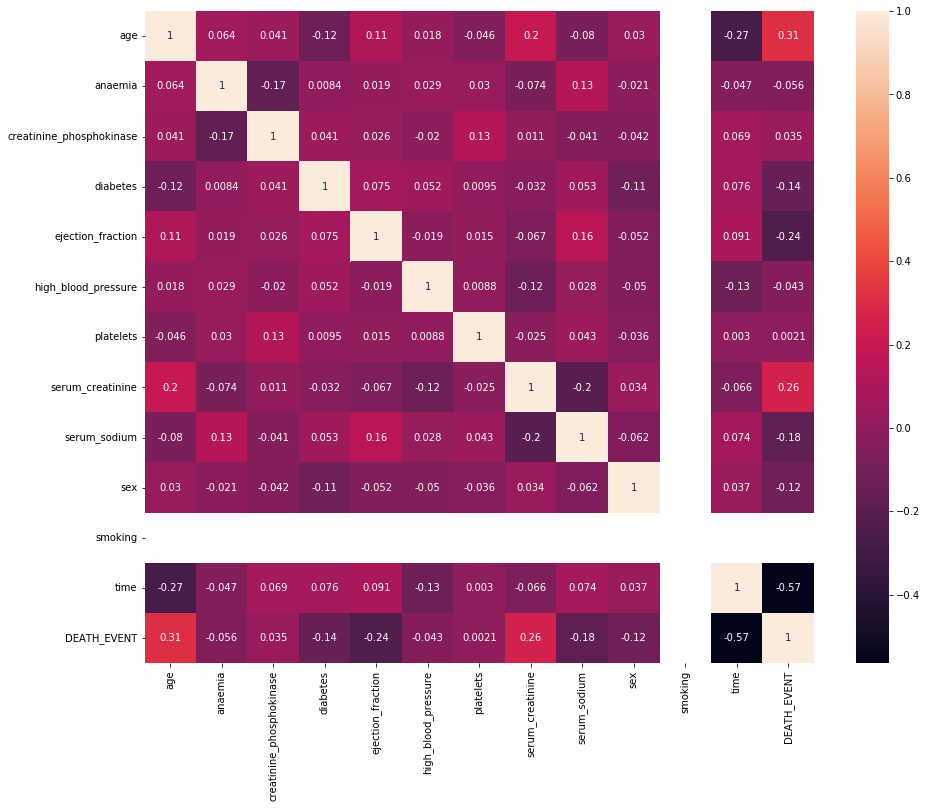

In [86]:
plt.figure(figsize=(15, 12))
sns.heatmap(fdf.corr(method='pearson'),annot=True)
plt.show()

#### Correlation also measures the relationship between two variables as well as its magnitude defines the strength between variables. It ranges from -1 to 1 and is usually denoted by r.

- **Perfectly Positive Correlation**: When correlation value is exactly 1.
- **Positive Correlation**: When correlation value falls between 0 to 1.
- **No Correlation**: When correlation value is 0.
- **Negative Correlation**: When correlation value falls between -1 to 0.
- **Perfectly Negative Correlation**: When correlation value is exactly -1

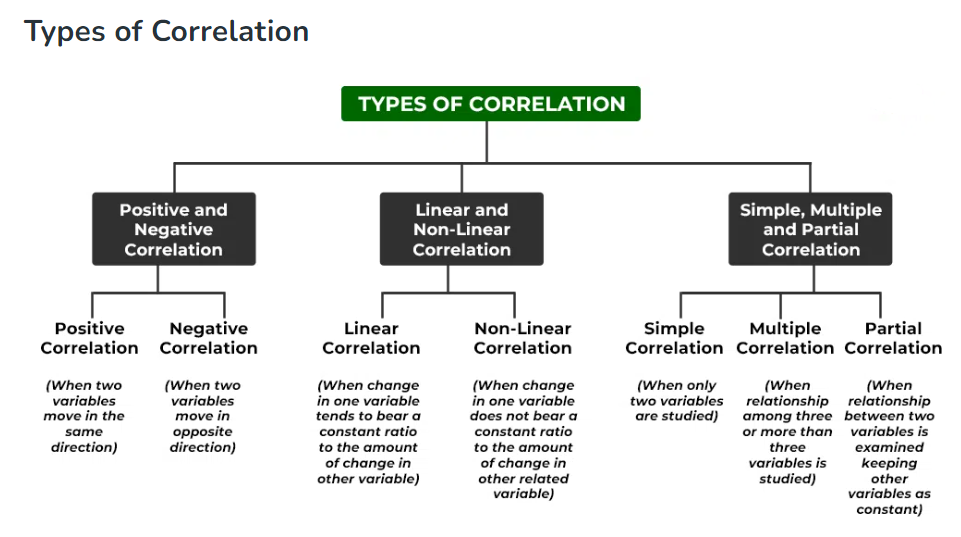

# Now Training 

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


In [65]:
X_train,X_test,y_train,y_test = train_test_split(fdf.drop('DEATH_EVENT',axis=1),fdf['DEATH_EVENT'],test_size=0.2,random_state=42)

In [66]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.8780487804878049
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[35  6]
 [ 4 37]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.90      0.85      0.88        41
           1       0.86      0.90      0.88        41

    accuracy                           0.88        82
   macro avg       0.88      0.88      0.88        82
weighted avg       0.88      0.88      0.88        82



In [67]:
scaler = StandardScaler()

In [68]:
x_train_scaled = scaler.fit_transform(X_train)
# x_test_scaled = scaler.fit_transform(X_test)


In [69]:
rf_scaled = RandomForestClassifier(random_state=42)
rf_scaled.fit(x_train_scaled,y_train)
y_pred = rf_scaled.predict(X_test)
print("-------------------------------------------------------------------------")
print(f"The accuraccy score is: ------>>  {accuracy_score(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Confusion Matrix is: ------>> \n{confusion_matrix(y_test,y_pred)}")
print("-------------------------------------------------------------------------")
print(f"The Classification Report is: ---->> \n {classification_report(y_test,y_pred)}")

-------------------------------------------------------------------------
The accuraccy score is: ------>>  0.5
-------------------------------------------------------------------------
The Confusion Matrix is: ------>> 
[[41  0]
 [41  0]]
-------------------------------------------------------------------------
The Classification Report is: ---->> 
               precision    recall  f1-score   support

           0       0.50      1.00      0.67        41
           1       0.00      0.00      0.00        41

    accuracy                           0.50        82
   macro avg       0.25      0.50      0.33        82
weighted avg       0.25      0.50      0.33        82



C:\Users\Leena Ali\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\Leena Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leena Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Leena Ali\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wi

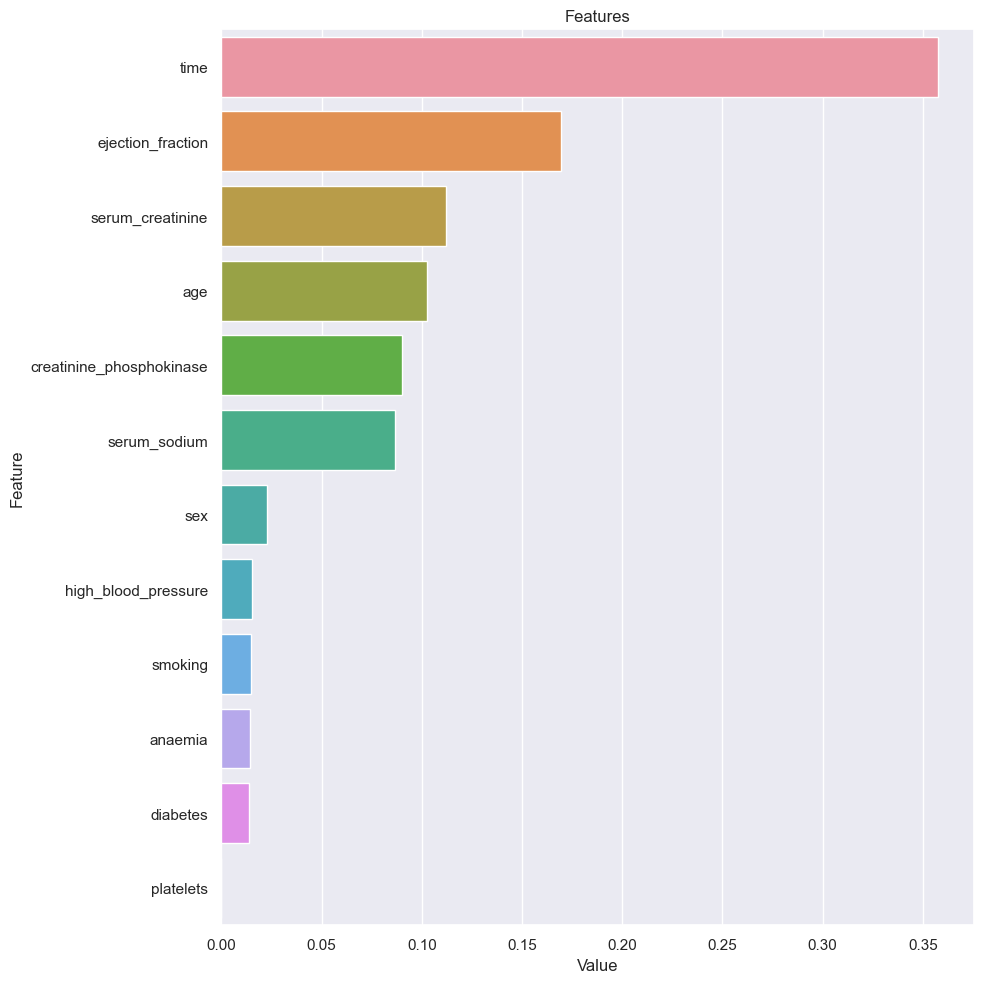

In [70]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save :
        plt.savefig('importances.png')

plot_importance(rf, X_train)

#### PCA
**PCA, or Principal Component Analysis**, is a technique used to simplify and understand complex data by reducing its dimensions while keeping important information. Imagine you have a lot of information about something, like different measurements or features. PCA helps in finding the most critical aspects or patterns within this information.
Let's learn this with an  example:

**Imagine you have a bunch of different fruits like apples, oranges, and bananas. Each fruit has different features like its size, weight, color, and sweetness. Now, let's say you want to understand these fruits better but it's hard to consider all those features at once. PCA, which stands for Principal Component Analysis, helps us simplify this. In Python, let's create a small collection of fruits represented by their features:**

In [236]:
import pandas as pd

# Creating a simple dataset of fruits with their features
data = {
    'Fruit': ['Apple', 'Orange', 'Banana'],
    'Size': [3, 6, 4],
    'Weight': [80, 120, 100],
    'Color': [1, 2, 3],  # Let's pretend numbers represent different colors
    'Sweetness': [7, 5, 9]
}

fruits_df = pd.DataFrame(data)


In [237]:
fruits_df

,Fruit,Size,Weight,Color,Sweetness
0,Apple,3,80,1,7
1,Orange,6,120,2,5
2,Banana,4,100,3,9


Now, with PCA in Python, we can use it to simplify and understand these fruits better by finding what's most important among these features. Let's see how the features relate to each other:

In [239]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separating the features from the fruit names
features = ['Size', 'Weight', 'Color', 'Sweetness']
x = fruits_df.loc[:, features].values
print("Original Values of x: \n", x)

# Standardizing the features
x = StandardScaler().fit_transform(x)
print("Values of x after standardization: \n", x)

# Applying PCA
pca = PCA(n_components=2)  # We want to see the top 2 important components
principalComponents = pca.fit_transform(x)

# Creating a DataFrame to see the new simplified features
principal_df = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])
print(principal_df)


Original Values of x: 
 [[  3  80   1   7]
 [  6 120   2   5]
 [  4 100   3   9]]
Values of x after standardization: 
 [[-1.06904497 -1.22474487 -1.22474487  0.        ]
 [ 1.33630621  1.22474487  0.         -1.22474487]
 [-0.26726124  0.          1.22474487  1.22474487]]
        PC1       PC2
0 -1.690309 -1.133893
1  2.112886 -0.566947
2 -0.422577  1.700840


PCA helps us create new features ('PC1' and 'PC2') that capture the most important things about these fruits. **'PC1' might represent a mix of some features, and 'PC2' might capture another mix**. Now we can use these simplified features to compare and understand the fruits better without having to deal with all the original details of size, weight, color, and sweetness.

In [186]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_scaled)
X_test_pca = pca.transform(x_test_scaled)

In [76]:
# Define the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [77]:
# Perform k-fold cross-validation before PCA
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores_before_pca = cross_val_score(rf_classifier, x_train_scaled, y_train, cv=kf)

In [78]:
# Print cross-validation scores
print(f'Cross-Validation Scores Before PCA: {cross_val_scores_before_pca}')
print(f'Mean Cross-Validation Score Before PCA: {np.mean(cross_val_scores_before_pca):.4f}')

Cross-Validation Scores Before PCA: [0.90769231 0.84615385 0.87692308 0.83076923 0.890625  ]
Mean Cross-Validation Score Before PCA: 0.8704


In [79]:
# Perform k-fold cross-validation after PCA
cross_val_scores_after_pca = cross_val_score(rf_classifier, X_train_pca, y_train, cv=kf)

print(f'\nCross-Validation Scores After PCA: {cross_val_scores_after_pca}')
print(f'Mean Cross-Validation Score After PCA: {np.mean(cross_val_scores_after_pca):.4f}')

NameError: name 'X_train_pca' is not defined

# Surely PCA is not good for small datasets

In [80]:
# Doing Hyperparameter tunning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [81]:
grid_search = GridSearchCV(rf_classifier, param_grid, cv=kf)
grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [193]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [194]:
print(best_params)
print(best_score)
print(grid_search.best_estimator_)

{'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
0.9025383395029086
RandomForestClassifier(min_samples_leaf=2, n_estimators=150, random_state=42)


In [195]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(grid_search.best_estimator_, x_train_scaled, y_train, cv=kf)

In [196]:
cross_val_scores

array([0.9516129 , 0.87096774, 0.90322581, 0.85245902, 0.93442623])

In [197]:
# Print cross-validation scores
print(f'Cross-Validation Scores After Tunning: {cross_val_scores}')
print(f'Mean Cross-Validation Score After Tunning: {np.mean(cross_val_scores):.4f}')

Cross-Validation Scores After Tunning: [0.9516129  0.87096774 0.90322581 0.85245902 0.93442623]
Mean Cross-Validation Score After Tunning: 0.9025


In [198]:
best_rf_model = grid_search.best_estimator_

# Use the best model to make predictions on the test set (x_test_scaled)
y_pred = best_rf_model.predict(x_test_scaled)

In [199]:
accuracy_score(y_test,y_pred)

0.9090909090909091

# Training different - different Classifiers

In [71]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

In [201]:
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 1.1 MB/s eta 0:01:32
   ---------------------------------------- 0.2/99.8 MB 2.5 MB/s eta 0:00:40
   ---------------------------------------- 0.5/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 1.0/99.8 MB 5.5 MB/s eta 0:00:19
    --------------------------------------- 1.6/99.8 MB 6.7 MB/s eta 0:00:15
    --------------------------------------- 1.8/99.8 MB 6.3 MB/s eta 0:00:16
   - -------------------------------------- 2.5/99.8 MB 7.7 MB/s eta 0:00:13
   - -------------------------------------- 2.7/99.8 MB 7.2 MB/s eta 0:00:14
   - -------------------------------------- 3.1/99.8 MB 7.2 MB/s eta 0:00:14
   - ---------------------------

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [203]:
!pip install catboost

  Obtaining dependency information for catboost from https://files.pythonhosted.org/packages/e2/63/379617e3d982e8a66c9d66ebf4621d3357c7c18ad356473c335bffd5aba6/catboost-1.2.2-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/47.0 kB ? eta -:--:--
     --------------------------------- ---- 41.0/47.0 kB 991.0 kB/s eta 0:00:01
     -------------------------------------- 47.0/47.0 kB 782.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/101.0 MB ? eta -:--:--
   ---------------------------------------- 0.2/101.0 MB 5.9 MB/s eta 0:00:17
   ---------------------------------------- 0.5/101.0 MB 6.0 MB/s eta 0:00:17
   ---------------------------------------- 0.9/101.0 MB 6.2 MB/s eta 0:00:17
   ---------------------------------------- 1.2/101.0 MB 6.1 MB/s eta 0:00:17
    --------------------------------------- 1.5/101.0 MB 6.6 MB/s eta 0:00:16
    --------------------------------------- 1.9/101.0 MB 6.8 MB/s eta 0:00:15
    ---------------

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [205]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.3 MB 2.5 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 2.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 2.3 MB/s eta 0:00:01
   ----------------- ---------------------- 0.6/1.3 MB 2.5 MB/s eta 0:00:01
   ----------------------- ---------------- 0.8/1.3 MB 2.8 MB/s eta 0:00:01
   ------------------------------- -------- 1.0/1.3 MB 3.3 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.3 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.3 MB/s eta 0:00:00


DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [72]:
# Define classifiers and their respective parameter grids
classifiers = {
    'AdaBoost': (AdaBoostClassifier(), {'n_estimators': [50, 100, 200]}),
    'GradientBoost': (GradientBoostingClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'XGBoost': (XGBClassifier(), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]}),
    'LogisticRegression': (LogisticRegression(), {'C': [0.1, 1.0, 10.0]}),
    'LGBM': (LGBMClassifier(verbose=-1), {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]})
}

In [73]:
# Perform grid search and cross-validation for each classifier
for clf_name, (clf, param_grid) in classifiers.items():
    print(f"Training and evaluating {clf_name}...")

    grid_search = GridSearchCV(clf, param_grid, cv=kf)

    grid_search.fit(x_train_scaled, y_train)
    
    cross_val_scores = cross_val_score(grid_search.best_estimator_, x_train_scaled, y_train, cv=kf)

    print(f"Cross-validation scores for {clf_name}:", cross_val_scores)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(x_test_scaled)
    
    # Calculate and print the accuracy on the test set
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Test set accuracy for {clf_name}: {accuracy}")
    print("\n")


Training and evaluating AdaBoost...


NameError: name 'kf' is not defined

# ENSEMBLE LEARNING

**Ensemble learning** is a machine learning technique that aggregates two or more learners (e.g. regression models, neural networks) in order to produce better predictions. In other words, an ensemble model combines several individual models to produce more accurate predictions than a single model alone.

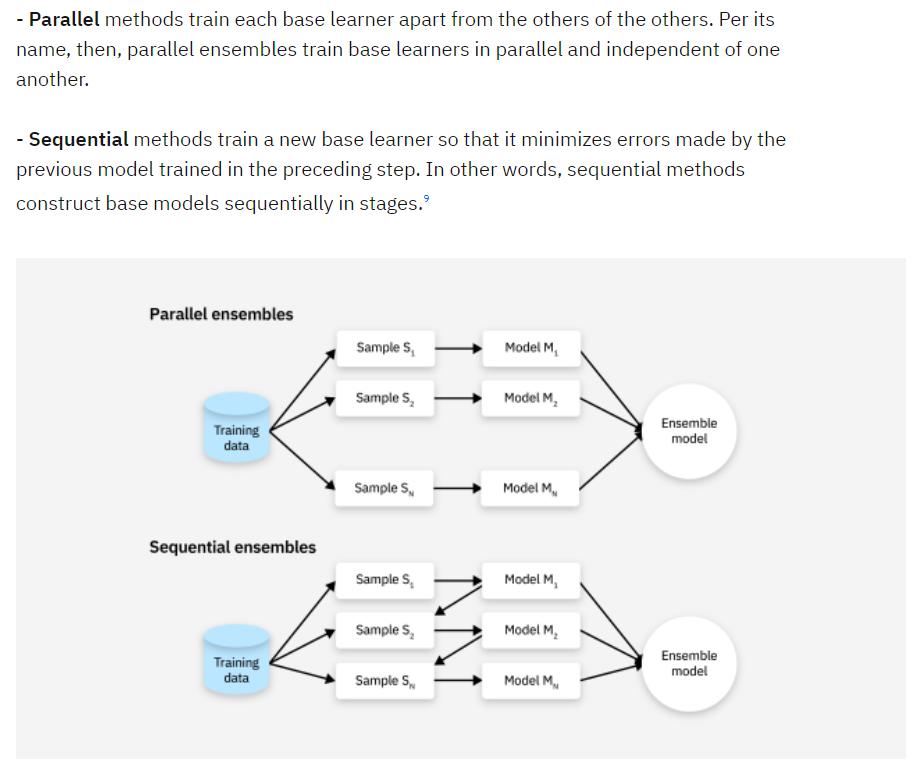
Parallel methods are further divided into homogenous and heterogenous methods. Homogenous parallel ensembles use the same base learning algorithm to produce all of the component base learners. Heterogenous parallel ensembles use different algorithms to produce base learners.


# Using Ensemble Technique

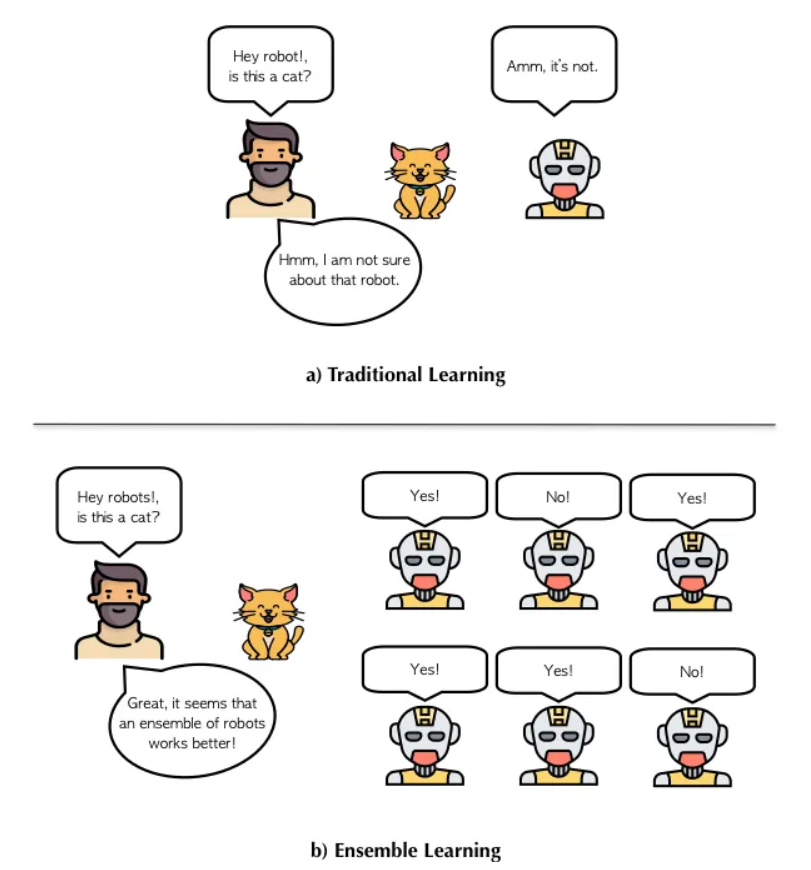

# VOTING
### HARD VOTING
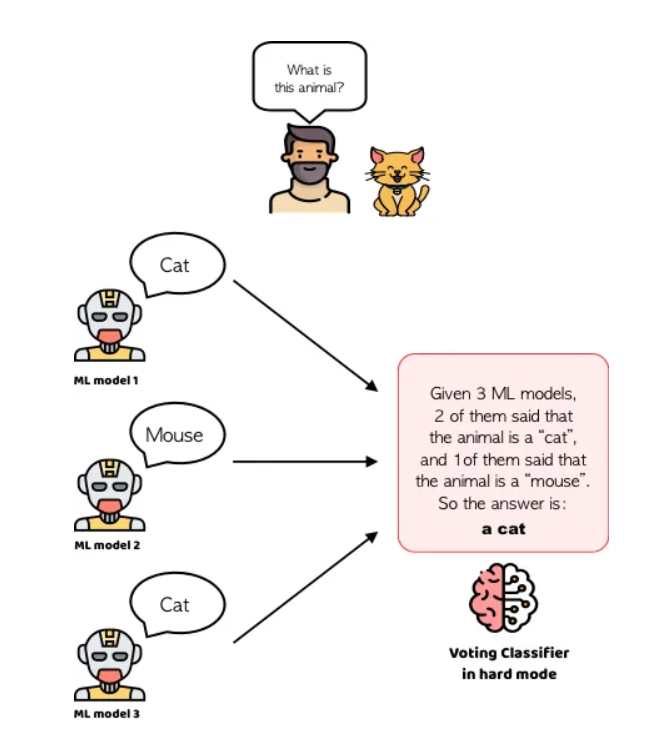

### SOFT VOTING
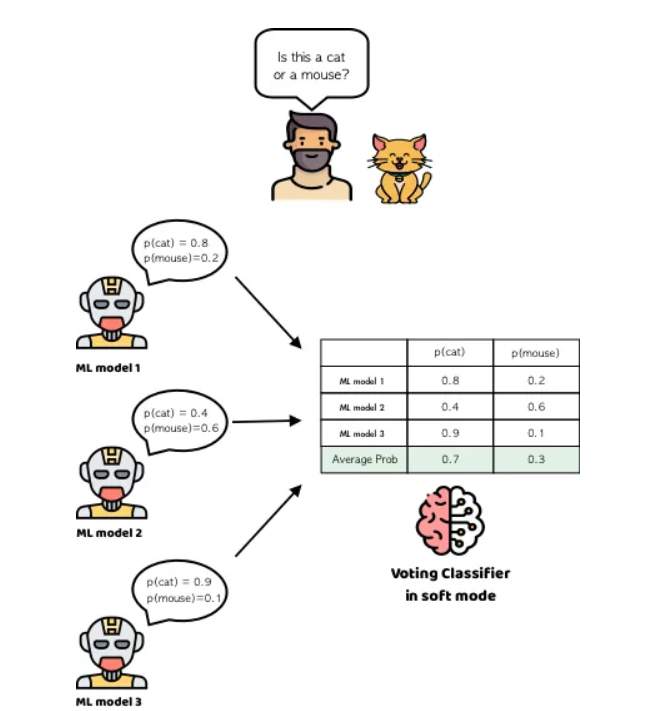

## Ensemble learning techniques
Perhaps three of the most popular ensemble learning techniques are bagging, boosting, and stacking. In fact, these together exemplify distinctions between sequential, parallel, homogenous, and heterogenous types of ensemble methods.


# BAGGING
**Bagging** is a **homogenous parallel method** sometimes called bootstrap aggregating. It uses modified replicates of a given training data set to train multiple base learners with the same training algorithm.

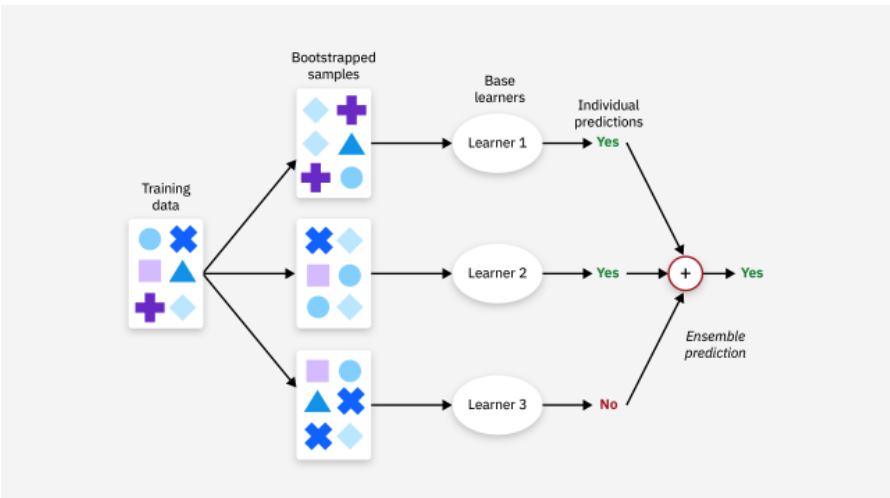


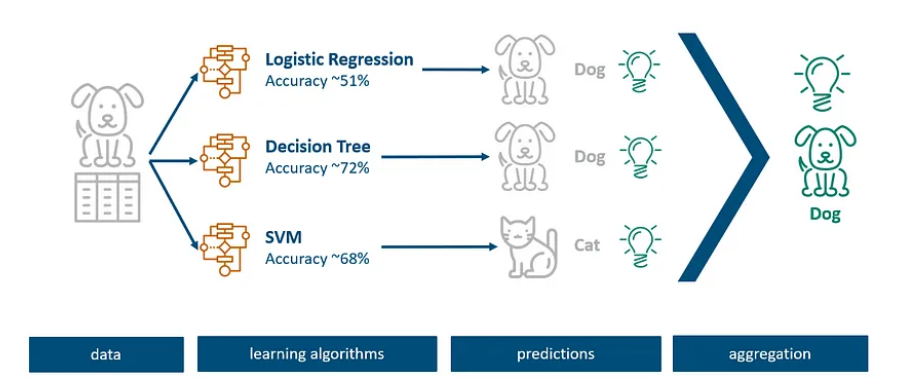

# STACKING
**Stacking**, or stacked generalization,15 is a **heterogenous parallel method** that exemplifies what is known as meta-learning. Meta-learning consists of training a meta-learner from the output of multiple base learners. Stacking specifically trains several base learners from the same dataset using a different training algorithm for each learner. Each base learner makes predictions on an unseen dataset. These first model predictions are then compiled and used to train a final model, being the meta-model.
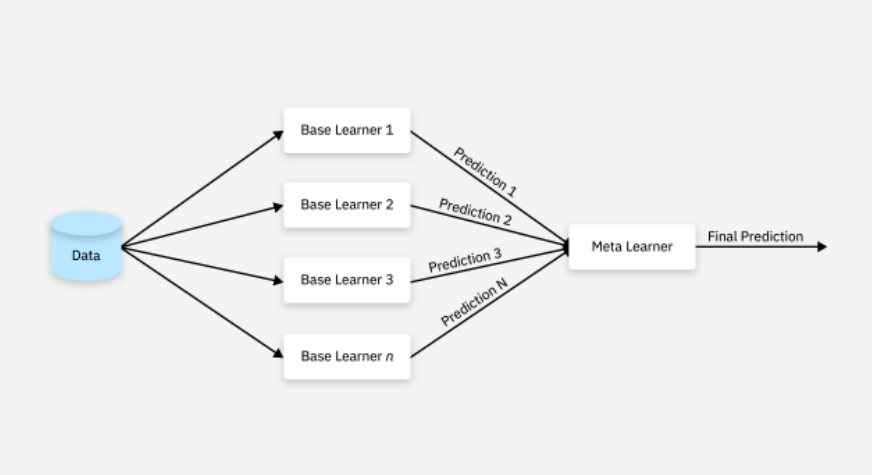


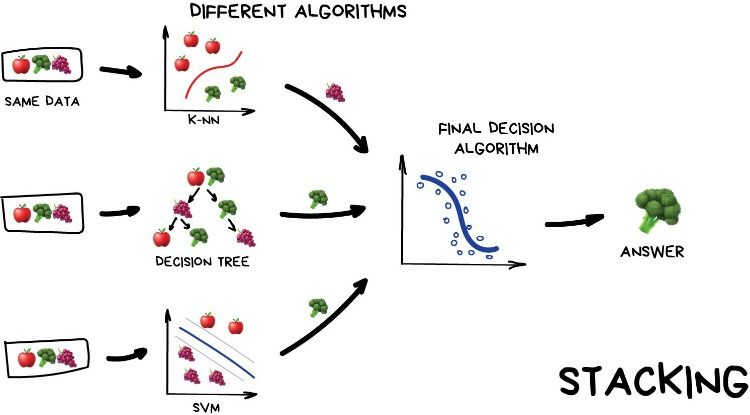

# BOOSTING
**Boosting** algorithms are a **sequential ensemble method**. Boosting has many variations, but they all follow the same general procedure. Boosting trains a learner on some initial dataset, d. The resultant learner is typically weak, misclassifying many samples in the dataset. Much like bagging, boosting then samples instances from the initial dataset to create a new dataset (d2). Unlike bagging, however, boosting prioritizes misclassified data instances from the first model or learner. A new learner is trained on this new dataset d2. Then a third dataset (d3) is then compiled from d1 and d2, prioritizes the second learner’s misclassified samples and instances in which d1 and d2 disagree. The process repeats n times to produce n learners. Boosting then combines and weights the all the learners together to produce final predictions.
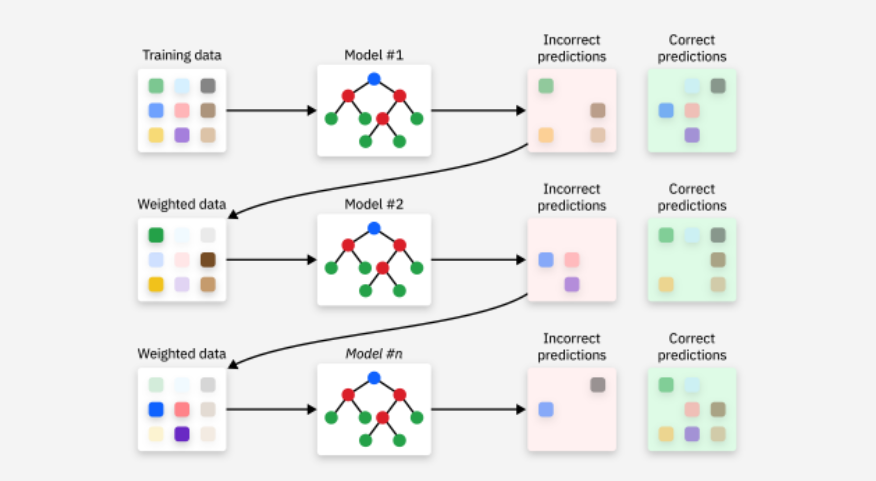


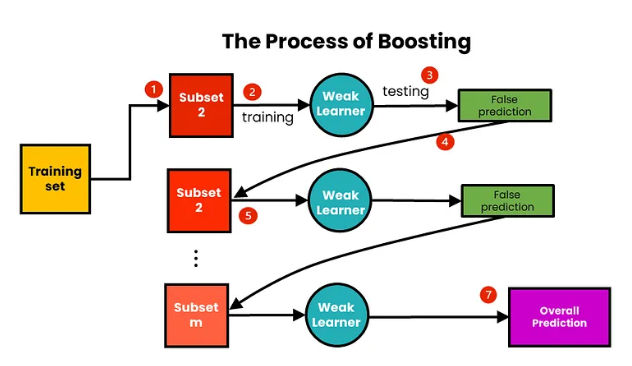

Boosting algorithms largely differ in how they prioritize erroneously predicted data instances when creating a new dataset. Two of the most prominent boosting methods may illustrate this:

- **Adaptive boosting (AdaBoost)** weights model errors. That is, when creating a new iteration of a dataset for training the next learner, AdaBoost adds weights to the previous learner’s misclassified samples, causing the next learner to prioritize those misclassified samples.

- **Gradient boosting** uses residual errors when training new learners. Rather than weight misclassified samples, gradient boosting uses residual errors from a previous model to set target predictions for the next model. In this way, it attempts to close the gap of error left by one model.

# Using Voting (It is a type of ensembling the models)

In [253]:
from sklearn.ensemble import VotingClassifier

# Define the base classifiers with their best hyperparameters
ada_best = AdaBoostClassifier(n_estimators=100)
gb_best = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
xgb_best = XGBClassifier(n_estimators=100, learning_rate=0.1)
lr_best = LogisticRegression(C=1.0)
cat_best = CatBoostClassifier(iterations=100, learning_rate=0.1)
lgbm_best = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)
rforest_best = RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

# Create a list of tuples with classifier names and their instances
classifiers = [
    ('AdaBoost', ada_best),
    ('GradientBoost', gb_best),
    ('XGBoost', xgb_best),
    ('LogisticRegression', lr_best),
    ('LGBM', lgbm_best),
    ('CatBoost', cat_best),
    ('Rforset',rforest_best)
]

# Create a VotingClassifier
ensemble_classifier = VotingClassifier(estimators=classifiers, voting='hard')

ensemble_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test set
ensemble_predictions = ensemble_classifier.predict(x_test_scaled)

# Calculate and print the accuracy of the ensemble on the test set
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Test Set Accuracy:", ensemble_accuracy)


0:	learn: 0.6699786	total: 2.33ms	remaining: 230ms
1:	learn: 0.6408386	total: 4.87ms	remaining: 239ms
2:	learn: 0.6124629	total: 7.26ms	remaining: 235ms
3:	learn: 0.5924711	total: 9.71ms	remaining: 233ms
4:	learn: 0.5756424	total: 12.1ms	remaining: 231ms
5:	learn: 0.5574349	total: 14.9ms	remaining: 234ms
6:	learn: 0.5415144	total: 17.3ms	remaining: 230ms
7:	learn: 0.5228537	total: 19.8ms	remaining: 228ms
8:	learn: 0.5101378	total: 21.4ms	remaining: 216ms
9:	learn: 0.4963952	total: 24.4ms	remaining: 220ms
10:	learn: 0.4830686	total: 27.6ms	remaining: 223ms
11:	learn: 0.4717534	total: 31ms	remaining: 228ms
12:	learn: 0.4573609	total: 34.4ms	remaining: 230ms
13:	learn: 0.4474837	total: 39.8ms	remaining: 245ms
14:	learn: 0.4379016	total: 44.5ms	remaining: 252ms
15:	learn: 0.4261889	total: 49.2ms	remaining: 259ms
16:	learn: 0.4188582	total: 55.2ms	remaining: 270ms
17:	learn: 0.4111944	total: 60ms	remaining: 273ms
18:	learn: 0.3999329	total: 64.7ms	remaining: 276ms
19:	learn: 0.3917748	total

#### Learning Rate
Imagine you're learning to ride a bicycle. The **learning_rate** is like how fast or slow you adjust when you're trying to find your balance.

If you adjust too fast, you might wobble a lot and it's hard to keep going straight. But if you adjust too slowly, you might fall over before you even correct your balance.

So, in machine learning, the learning rate is kinda like how much we change things like weights and biases in our algorithms to learn from the data. If we change them too much, we might not get to the right answer, and if we change them too little, it might take forever to learn anything. We want it just right, like finding the perfect balance on a bike!

#### Estimators
Imagine you have a bunch of friends, and you're trying to make a decision together. Each friend has their own opinion, and you want to combine all those opinions to make the best decision.

In ensemble techniques like Random Forest or Gradient Boosting, **n_estimators** is like how many friends you ask for their opinion. Each friend represents a "tree" in the forest. So, if you have 100 friends (or trees), you're asking 100 trees for their opinions.

With more friends (or trees), you get a broader range of opinions to consider. So, increasing n_estimators can make your decision more robust and reliable. However, having too many friends (or trees) can also make things slow and complicated.

# Using Stacking (It is a type of ensembling the models)

In [254]:
from sklearn.ensemble import StackingClassifier

# Define the base classifiers with their best hyperparameters
ada_best = AdaBoostClassifier(n_estimators=100)
gb_best = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)
xgb_best = XGBClassifier(n_estimators=100, learning_rate=0.1)
lr_best = LogisticRegression(C=1.0)
cat_best = CatBoostClassifier(iterations=100, learning_rate=0.1)
lgbm_best = LGBMClassifier(n_estimators=100, learning_rate=0.1, verbose=-1)
rforest_best = RandomForestClassifier(max_depth=10, n_estimators=150, random_state=42)

# Create a list of tuples with classifier names and their instances
base_classifiers = [
    ('AdaBoost', ada_best),
    ('GradientBoost', gb_best),
    ('XGBoost', xgb_best),
    ('LogisticRegression', lr_best),
    ('LGBM', lgbm_best),
    ('CatBoost', cat_best),
    ('Rforset', rforest_best)
]

# Create a StackingClassifier with a meta-classifier (Logistic Regression in this case)
stacking_classifier = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())

stacking_classifier.fit(x_train_scaled, y_train)

# Make predictions on the test set
stacking_predictions = stacking_classifier.predict(x_test_scaled)

# Calculate and print the accuracy of the stacking classifier on the test set
stacking_accuracy = accuracy_score(y_test, stacking_predictions)
print("Stacking Test Set Accuracy:", stacking_accuracy)


0:	learn: 0.6699786	total: 2.88ms	remaining: 286ms
1:	learn: 0.6408386	total: 6.06ms	remaining: 297ms
2:	learn: 0.6124629	total: 7.93ms	remaining: 256ms
3:	learn: 0.5924711	total: 10.5ms	remaining: 252ms
4:	learn: 0.5756424	total: 13.1ms	remaining: 248ms
5:	learn: 0.5574349	total: 15.4ms	remaining: 242ms
6:	learn: 0.5415144	total: 18.1ms	remaining: 240ms
7:	learn: 0.5228537	total: 21.6ms	remaining: 249ms
8:	learn: 0.5101378	total: 24ms	remaining: 242ms
9:	learn: 0.4963952	total: 27.4ms	remaining: 246ms
10:	learn: 0.4830686	total: 30.1ms	remaining: 244ms
11:	learn: 0.4717534	total: 33ms	remaining: 242ms
12:	learn: 0.4573609	total: 38.3ms	remaining: 256ms
13:	learn: 0.4474837	total: 43.1ms	remaining: 265ms
14:	learn: 0.4379016	total: 47.9ms	remaining: 271ms
15:	learn: 0.4261889	total: 53.4ms	remaining: 280ms
16:	learn: 0.4188582	total: 57.9ms	remaining: 283ms
17:	learn: 0.4111944	total: 62.7ms	remaining: 286ms
18:	learn: 0.3999329	total: 68ms	remaining: 290ms
19:	learn: 0.3917748	total: 

0:	learn: 0.6721796	total: 2.15ms	remaining: 213ms
1:	learn: 0.6438132	total: 5.29ms	remaining: 259ms
2:	learn: 0.6182781	total: 7.55ms	remaining: 244ms
3:	learn: 0.5974860	total: 9.55ms	remaining: 229ms
4:	learn: 0.5819955	total: 11.1ms	remaining: 212ms
5:	learn: 0.5614731	total: 13.2ms	remaining: 207ms
6:	learn: 0.5438370	total: 15.3ms	remaining: 203ms
7:	learn: 0.5304072	total: 17.6ms	remaining: 202ms
8:	learn: 0.5163398	total: 19.9ms	remaining: 201ms
9:	learn: 0.5021791	total: 22.5ms	remaining: 203ms
10:	learn: 0.4860281	total: 24.6ms	remaining: 199ms
11:	learn: 0.4769504	total: 27.2ms	remaining: 199ms
12:	learn: 0.4652941	total: 29.4ms	remaining: 197ms
13:	learn: 0.4558933	total: 31.3ms	remaining: 192ms
14:	learn: 0.4472793	total: 33.9ms	remaining: 192ms
15:	learn: 0.4383601	total: 36ms	remaining: 189ms
16:	learn: 0.4305447	total: 38.4ms	remaining: 187ms
17:	learn: 0.4246678	total: 40.8ms	remaining: 186ms
18:	learn: 0.4146861	total: 42.7ms	remaining: 182ms
19:	learn: 0.4087081	tot

97:	learn: 0.1476487	total: 414ms	remaining: 8.44ms
98:	learn: 0.1464101	total: 417ms	remaining: 4.21ms
99:	learn: 0.1449839	total: 420ms	remaining: 0us
0:	learn: 0.6710789	total: 5.48ms	remaining: 542ms
1:	learn: 0.6430947	total: 10.5ms	remaining: 514ms
2:	learn: 0.6191607	total: 15ms	remaining: 484ms
3:	learn: 0.6019087	total: 21.3ms	remaining: 511ms
4:	learn: 0.5815036	total: 25.6ms	remaining: 486ms
5:	learn: 0.5628139	total: 29.7ms	remaining: 466ms
6:	learn: 0.5421862	total: 35.5ms	remaining: 472ms
7:	learn: 0.5272438	total: 40ms	remaining: 460ms
8:	learn: 0.5147328	total: 44.4ms	remaining: 449ms
9:	learn: 0.5011688	total: 48.8ms	remaining: 439ms
10:	learn: 0.4845869	total: 51.7ms	remaining: 419ms
11:	learn: 0.4740806	total: 55.3ms	remaining: 406ms
12:	learn: 0.4599450	total: 58ms	remaining: 388ms
13:	learn: 0.4486499	total: 60.3ms	remaining: 371ms
14:	learn: 0.4373991	total: 62.4ms	remaining: 354ms
15:	learn: 0.4255710	total: 65.8ms	remaining: 346ms
16:	learn: 0.4172686	total: 69.

66:	learn: 0.2070969	total: 274ms	remaining: 135ms
67:	learn: 0.2048649	total: 278ms	remaining: 131ms
68:	learn: 0.2019311	total: 281ms	remaining: 126ms
69:	learn: 0.1992622	total: 284ms	remaining: 122ms
70:	learn: 0.1968221	total: 286ms	remaining: 117ms
71:	learn: 0.1946131	total: 289ms	remaining: 113ms
72:	learn: 0.1921677	total: 293ms	remaining: 108ms
73:	learn: 0.1895637	total: 297ms	remaining: 104ms
74:	learn: 0.1869834	total: 301ms	remaining: 100ms
75:	learn: 0.1847495	total: 306ms	remaining: 96.6ms
76:	learn: 0.1829294	total: 311ms	remaining: 92.8ms
77:	learn: 0.1803966	total: 315ms	remaining: 88.8ms
78:	learn: 0.1777481	total: 322ms	remaining: 85.7ms
79:	learn: 0.1760019	total: 328ms	remaining: 81.9ms
80:	learn: 0.1738094	total: 333ms	remaining: 78.1ms
81:	learn: 0.1720658	total: 337ms	remaining: 74ms
82:	learn: 0.1704971	total: 341ms	remaining: 69.9ms
83:	learn: 0.1689339	total: 346ms	remaining: 65.9ms
84:	learn: 0.1668677	total: 350ms	remaining: 61.8ms
85:	learn: 0.1650457	to

## BAGGING 
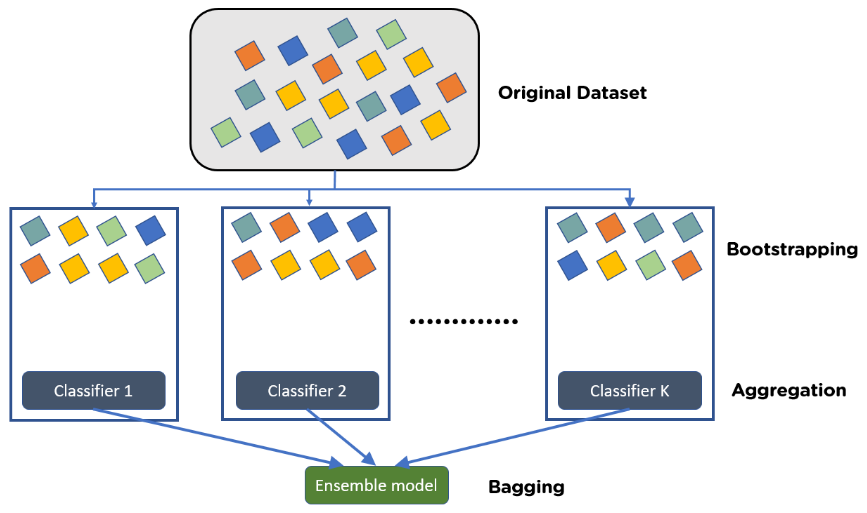

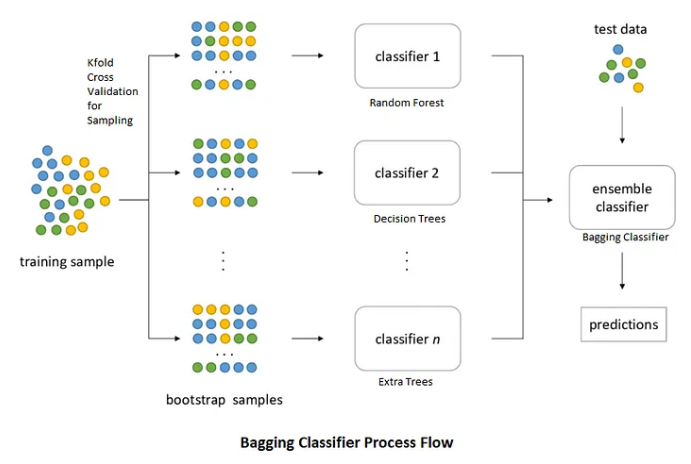

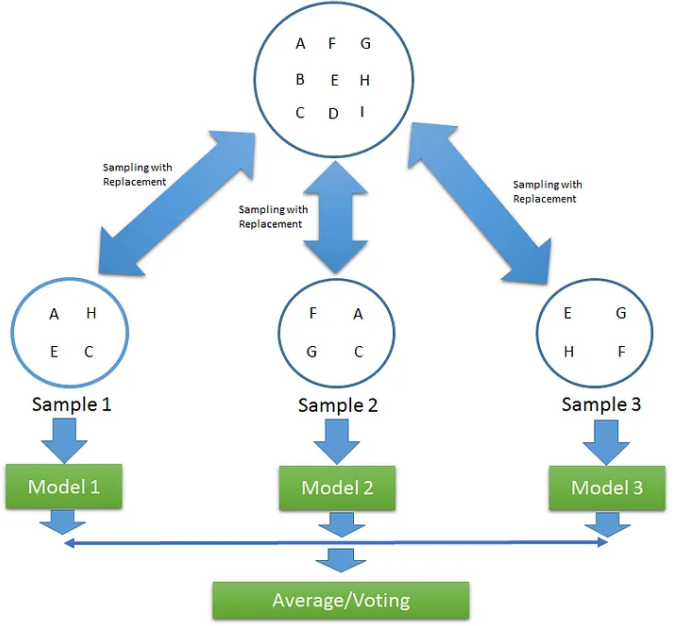

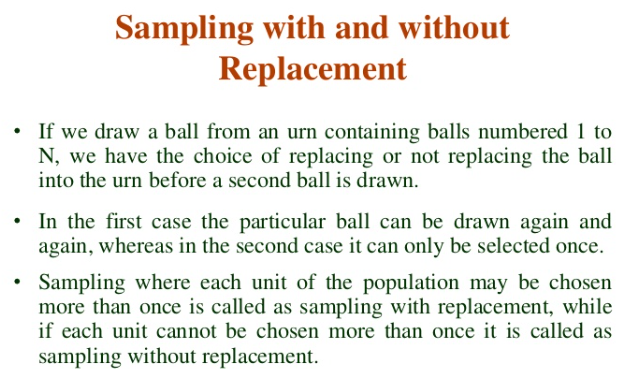

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base model (decision tree) constructor
def create_base_model():
    return DecisionTreeClassifier(random_state=42)

# Create a bagging classifier with the base model and 10 estimators
bagging_classifier = BaggingClassifier(base_model=create_base_model, n_estimators=10, random_state=42)

# Train the bagging classifier
bagging_classifier.fit(X_train, y_train)

# Make predictions
bagging_predictions = bagging_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, bagging_predictions)
print("Bagging Classifier Accuracy:", accuracy)


Bagging Classifier Accuracy: 1.0


In [1]:
import numpy as np

class BaggingClassifier:
    def __init__(self, base_model, n_estimators=10, random_state=None):
        self.base_model = base_model
        self.n_estimators = n_estimators
        self.random_state = random_state
        self.estimators = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        for _ in range(self.n_estimators):
            # Create a bootstrap sample (sampling with replacement)
            indices = np.random.choice(len(X), size=len(X), replace=True)
            X_bootstrap, y_bootstrap = X[indices], y[indices]

            # Train a base model on the bootstrap sample
            model = self.base_model()
            model.fit(X_bootstrap, y_bootstrap)
            self.estimators.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.estimators])
        # Take the majority vote along the first axis (axis=0)
        # This selects the most common prediction for each sample
        bagging_predictions = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=predictions)
        return bagging_predictions

# Boosting Algorithm
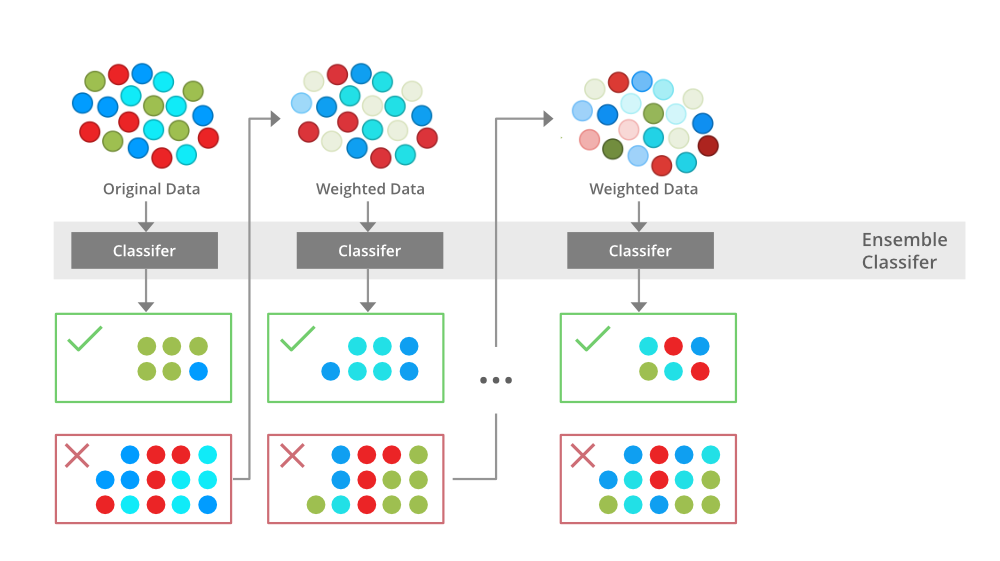

### Step 1: Import necessary libraries

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


### Step 2: Load the Iris dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target


### Step 3: Split the dataset into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 4: Create a weak learner (base estimator)

In [4]:
base_estimator = DecisionTreeClassifier(max_depth=1)  # Decision tree with only one level


### Step 5: Create the AdaBoost classifier

In [5]:
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
# Here, n_estimators is the number of weak learners to combine.

### Step 6: Train the AdaBoost classifier

In [6]:
adaboost_classifier.fit(X_train, y_train)

C:\Users\Leena Ali\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

### Step 7: Make predictions

In [7]:
predictions = adaboost_classifier.predict(X_test)


### Step 8: Evaluate the model

In [8]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)


Accuracy: 1.0


# Hence After getting the best Model

In [261]:
import joblib
filename = "Completed_model.joblib"
joblib.dump(stacking_classifier, filename)

['Completed_model.joblib']

In [264]:
import joblib
loaded_model = joblib.load("Completed_model.joblib")
X_new = [75,0,582,0,20,1,265000,1.9,130,1,0,4]
y_pred = loaded_model.predict(X_new)
result = loaded_model.score(X_test, y_test)
print(result)

ValueError: Expected 2D array, got 1D array instead:
array=[7.50e+01 0.00e+00 5.82e+02 0.00e+00 2.00e+01 1.00e+00 2.65e+05 1.90e+00
 1.30e+02 1.00e+00 0.00e+00 4.00e+00].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [267]:
import joblib
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(rf, filename)
 
# some time later...
 
# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.922077922077922


In [268]:
loaded_model.predict(X_test) 

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [270]:
y_test.values

array([0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0], dtype=int64)